In [1]:
import astropy.units as u
import astropy.constants as c
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel1

In [2]:
%matplotlib inline

In [ ]:
scipy.special.hankel1(1, np.j*)

In [40]:
def hankelprime(a, x):
    return 0.5*(hankel1(a-1,x) - hankel1(a+1,x))

In [44]:
def hyperbolic_spectrum(frequencies, m1, m2, v0, b):
    mu = (m1*m2)/(m1+m2)
    m = m1+m2
    alpha = c.G*mu*m
    a = alpha/(mu*v0**2)
    frac = (c.G * a**4 * m**2 * np.pi**2) / (720*c.c**5)
    nu = frequencies * np.sqrt(mu*a**3 / alpha)
    epsilon = np.sqrt( 1 + ( v0**4 * b**2) / (c.G**2 * m**2))
    #return frac * frequencies**4
    return hankelprime(1j*nu.value, 1j*nu.value*epsilon.value)

In [3]:
frequencies = np.logspace(0,4, 1000)

In [27]:
hyperbolic_spectrum(frequencies, 1*u.solMass, 1*u.solMass, 1e3*u.kilometer/u.second, 1*u.AU)#.to(u.meter**2 * u.second**3 * u.kilogram)

NameError: name 'hyperbolic_spectrum' is not defined

In [3]:
def reduced_mass(m1, m2):
    return m1*m2 / (m1+m2)

In [28]:
def hyperbolic_strain(R, b, m1, m2, v, phi=3.14/2*u.rad):
    
    R = R.to(u.meter)
    b = b.to(u.meter)
    v = v.to(u.meter/u.second)
    
    m1, m2 = m1.to(u.kilogram), m2.to(u.kilogram)
    mu = reduced_mass(m1, m2)
    
    phi0 = np.arctan( -b*v**2 / (c.G * (m1 + m2))  )
    first = (2*c.G)/(R*c.c**4) * mu * v**2
    print phi0
    #print np.cos(59*phi0-phi)#, phi0
    second = 2 * (59*np.cos(2*(phi0-phi)) - np.cos(phi) * (54 * np.cos(2*phi0) + 101)) * np.cos(phi0)**2
    third  = -9*np.cos(3*phi-4*phi0) - 9*np.cos(3*phi - 2*phi0) + 95*np.cos(2*phi0) + 9 * np.cos(4*phi0)
    fourth =  - np.sin(phi)*(101*np.sin(2*phi0) + 27*np.sin(4*phi0)) + 106
    return first *  np.cos(phi0)**-2 * (second + third + fourth)**(0.5)

In [8]:
def phi0(b, v, m1, m2):
    return np.arctan( -b*v**2 / (c.G * (m1 + m2))  )

In [9]:
import numpy as np

In [10]:
phi0

<function __main__.phi0>

In [23]:
b=1*u.AU
v = 100*u.kilometer/u.second
phi = np.linspace(0,np.pi,1000)*u.radian
phiz = phi0(b, 2000*u.kilometer/u.second, 1.4*u.solMass, 14*u.solMass,)#*u.radian
t = (((np.sin(phiz)**2 * b) / ( (np.cos(phi-phiz) -np.cos(phiz))**2 *v )).to(u.second)) #/ phi

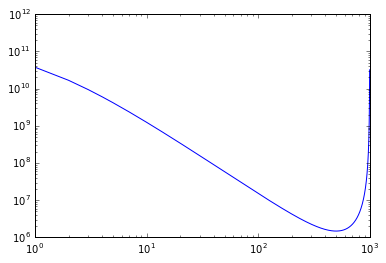

In [26]:
plt.loglog(t[1:])

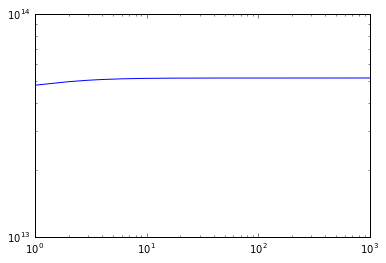

In [22]:
plt.loglog(np.cumsum(t[1:])-t[2])

In [117]:
b = np.linspace(0, 1, 100)*u.AU

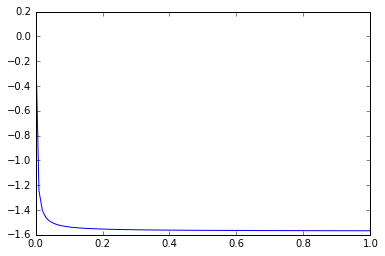

In [133]:
plt.plot(b, phi0(b, 2000*u.kilometer/u.second, 1.4*u.solMass, 14*u.solMass,))

-1.53664568694 rad


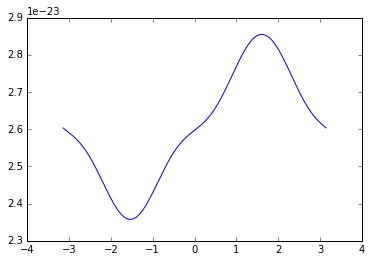

In [33]:
phi = np.linspace(-np.pi,np.pi,1000)
h = hyperbolic_strain(800*u.megaparsec, .1*u.AU, 1.4*u.solMass, 14*u.solMass, 2000*u.kilometer/u.second, phi*u.rad)
plt.plot(phi, h)

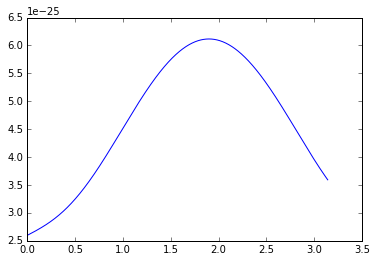

ValueError: x and y must have same first dimension

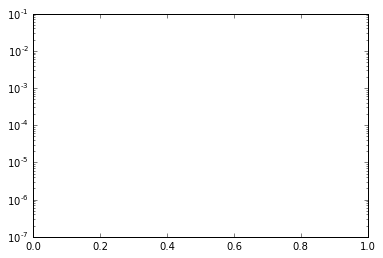

In [80]:
plt.semilogy(phi, h)

In [29]:
R = 27200*u.lightyear
mu = reduced_mass(1*u.solMass, 1e6*u.solMass)
v = 1e3 * u.kilometer / u.second

first = ((2*c.G)/(R*c.c**4) * mu * v**2).to(1)

In [30]:
first

<Quantity 1.277278446111121e-22>

In [33]:
R.to(u.kiloparsec)

<Quantity 8.339557911032314 kpc>